# Лабораторная работа №1 Леоненкова Елена
М8О-311Б-23

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# EDA и построение графиков

In [74]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("Размер обучающей выборки:", df_train.shape)
print("Размер тестовой выборки:", df_test.shape)

Размер обучающей выборки: (11017, 35)
Размер тестовой выборки: (5000, 35)


In [75]:
df_train.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [77]:
print("\n" + "="*50)
print("АНАЛИЗ ПРОПУСКОВ")
print("="*50)
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

print("\nПропуски в обучающей выборке:")
print(missing_train[missing_train > 0])
print(f"\nВсего пропусков в train: {missing_train.sum()}")
print(f"Всего пропусков в test: {missing_test.sum()}")



АНАЛИЗ ПРОПУСКОВ

Пропуски в обучающей выборке:
ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
Educat

In [78]:
print("RiskScore статистика:")
print(y.describe())
print()

print("Квартили RiskScore:")
print(f"25%: {y.quantile(0.25)}")
print(f"50%: {y.quantile(0.50)}")
print(f"75%: {y.quantile(0.75)}")
print()

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = y[(y < lower_bound) | (y > upper_bound)]
print(f"Найдено выбросов (IQR метод): {len(outliers)} ({100*len(outliers)/len(y):.1f}%)")
print(f"Диапазон нормы: [{lower_bound:.2f}, {upper_bound:.2f}]")

RiskScore статистика:
count    10272.000000
mean        48.358094
std         17.241456
min         14.841417
25%         32.722756
50%         44.195792
75%         65.124190
max         97.597249
Name: RiskScore, dtype: float64

Квартили RiskScore:
25%: 32.72275611943416
50%: 44.195792422081965
75%: 65.1241904382877

Найдено выбросов (IQR метод): 0 (0.0%)
Диапазон нормы: [-15.88, 113.73]


In [79]:
print("\n" + "="*50)
print("СТАТИСТИЧЕСКОЕ ОПИСАНИЕ")
print("="*50)
print(df_train.describe())
print(f"\nТип целевой переменной RiskScore: {df_train['RiskScore'].dtype}")
print(f"Диапазон RiskScore: [{df_train['RiskScore'].min():.2f}, {df_train['RiskScore'].max():.2f}]")



СТАТИСТИЧЕСКОЕ ОПИСАНИЕ
                Age   AnnualIncome  CreditScore     LoanAmount  LoanDuration  \
count  10487.000000   10487.000000  9986.000000    9986.000000  10487.000000   
mean      39.850386  131587.872127   678.082716   29874.218306     53.439878   
std       11.614132  115791.941909   175.192486   27705.509722     24.493562   
min       18.000000   15000.000000   300.000000    1063.000000     12.000000   
25%       32.000000   20959.500000   550.000000   12658.000000     36.000000   
50%       40.000000   89015.000000   722.500000   21828.500000     48.000000   
75%       48.000000  257025.000000   850.000000   37158.000000     60.000000   
max       80.000000  748508.000000   850.000000  418997.000000    120.000000   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
count        10487.000000          9986.000000               10487.000000   
mean             1.568323           546.458642                   0.284397   
std              1.4186

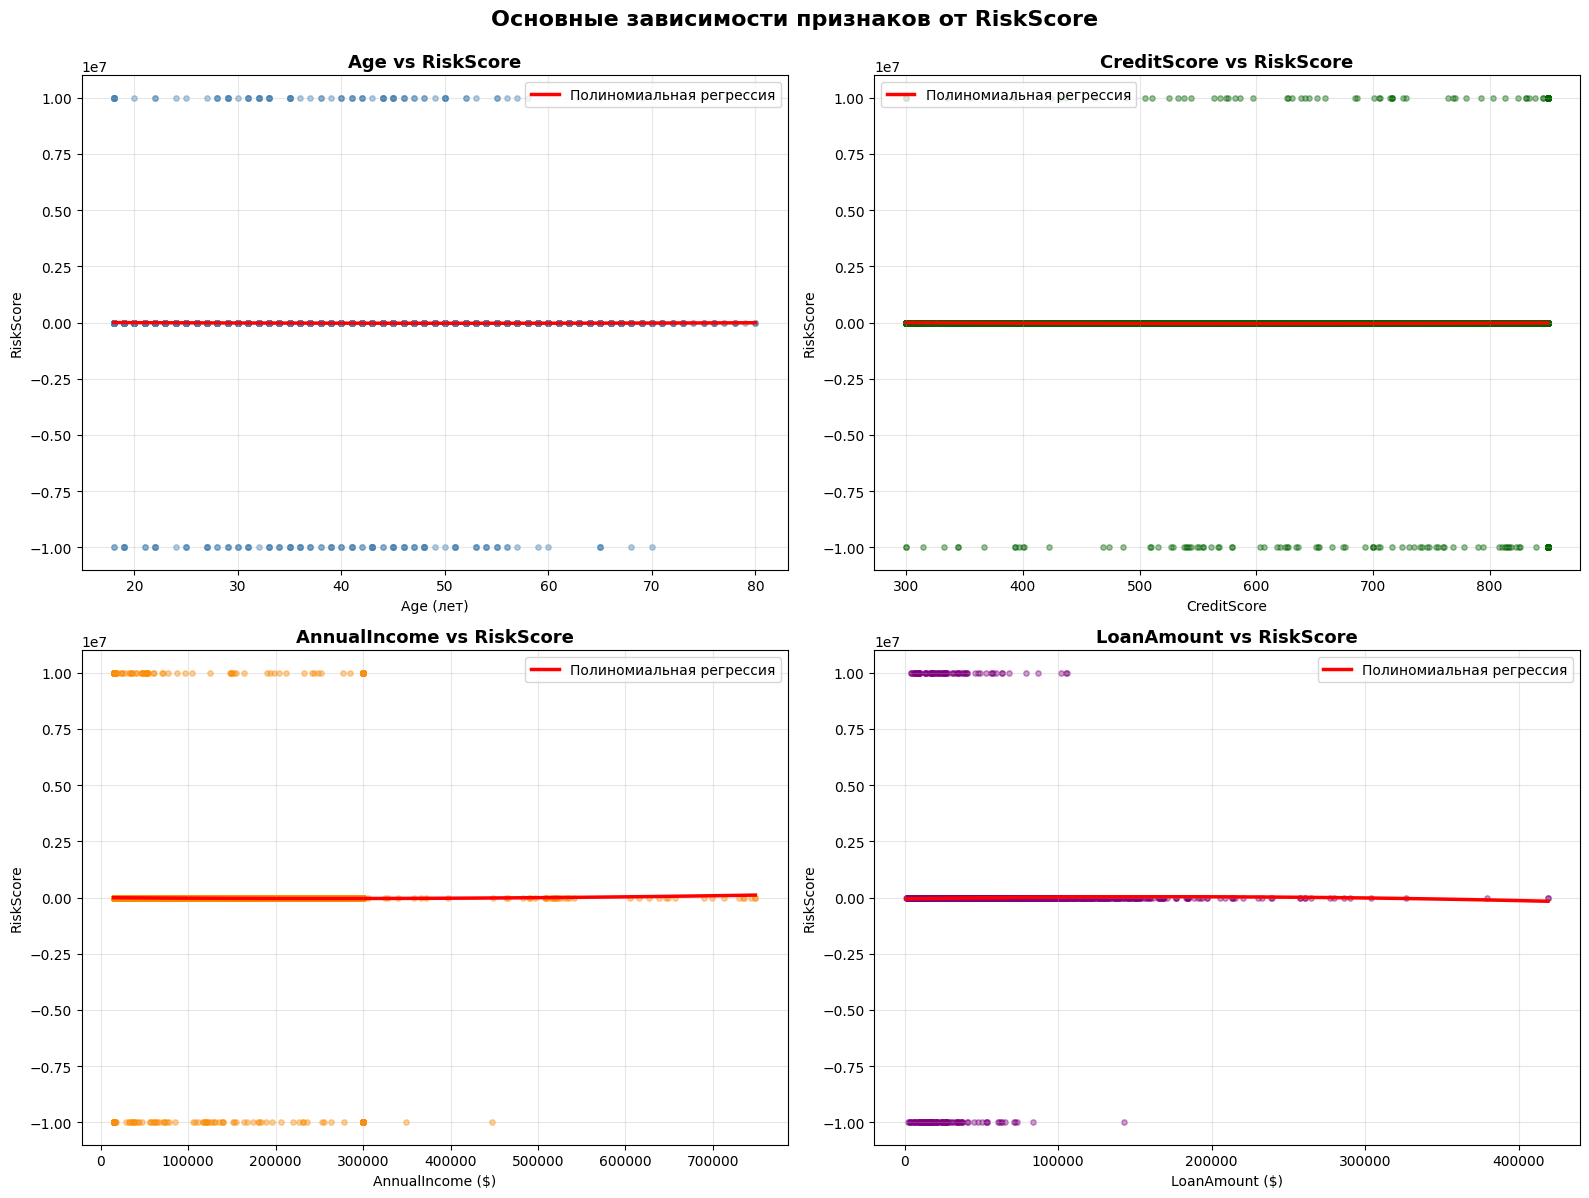

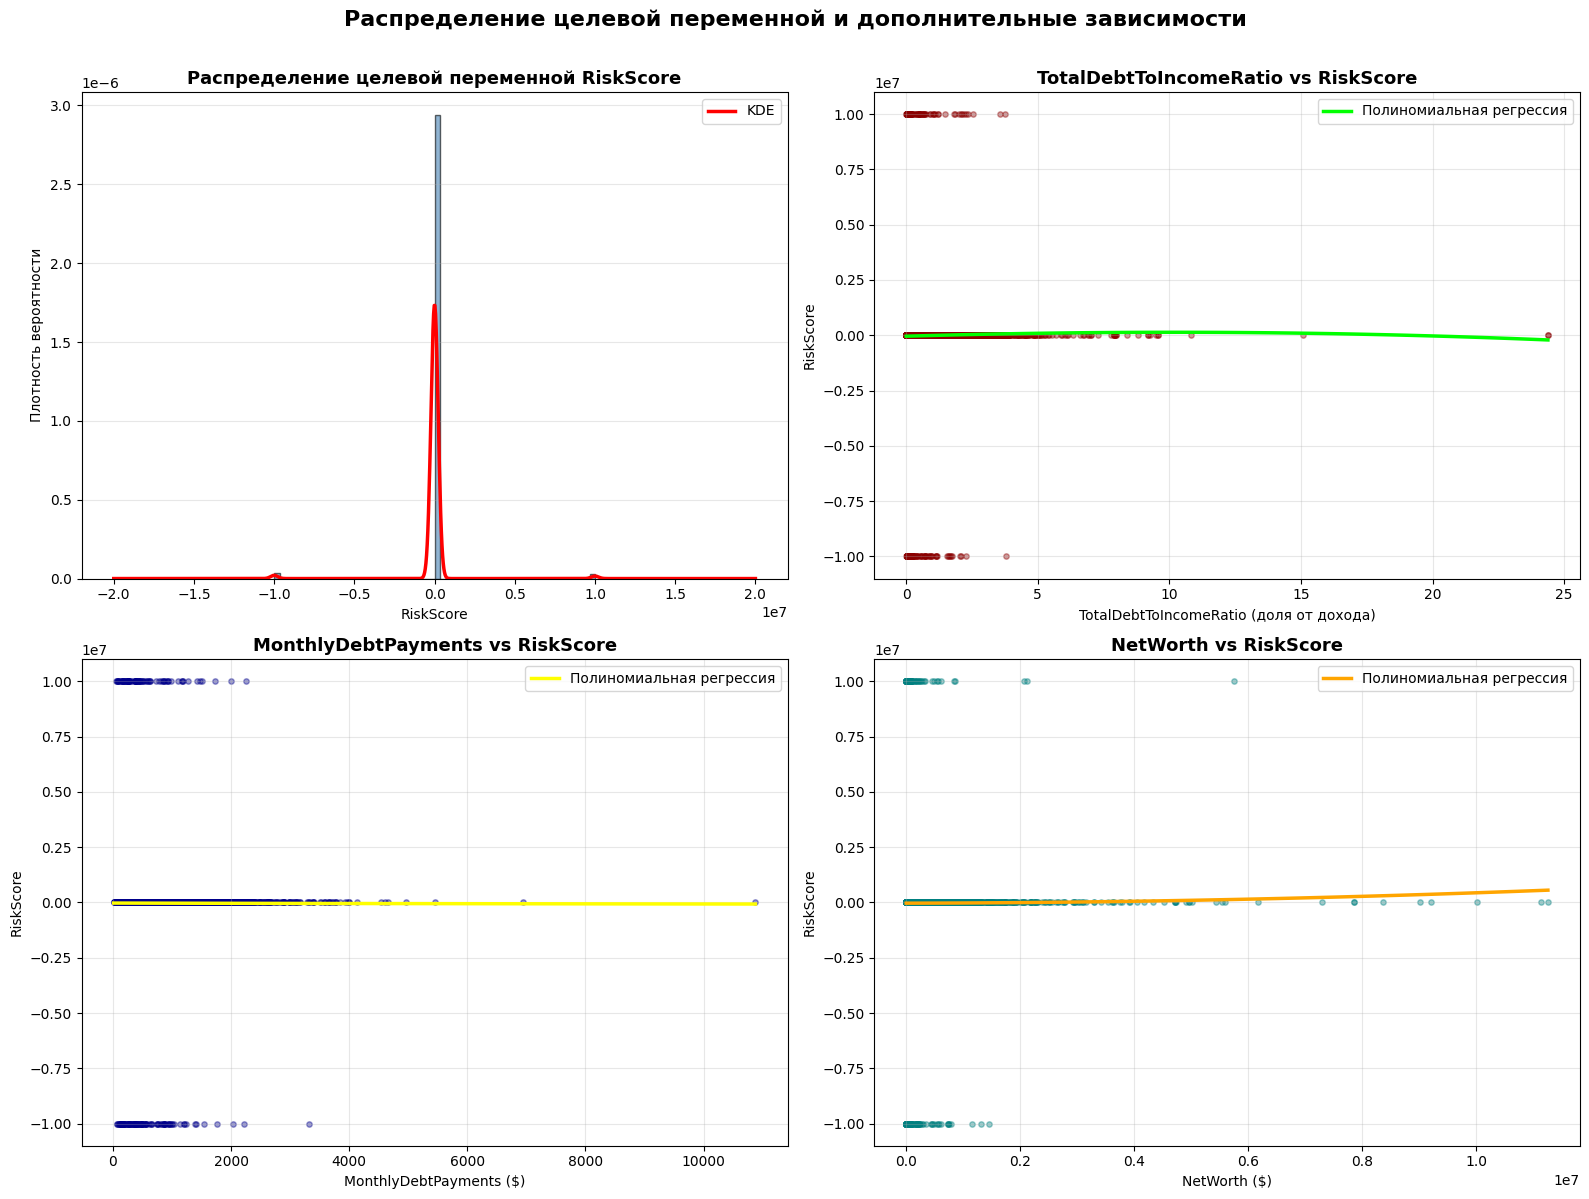

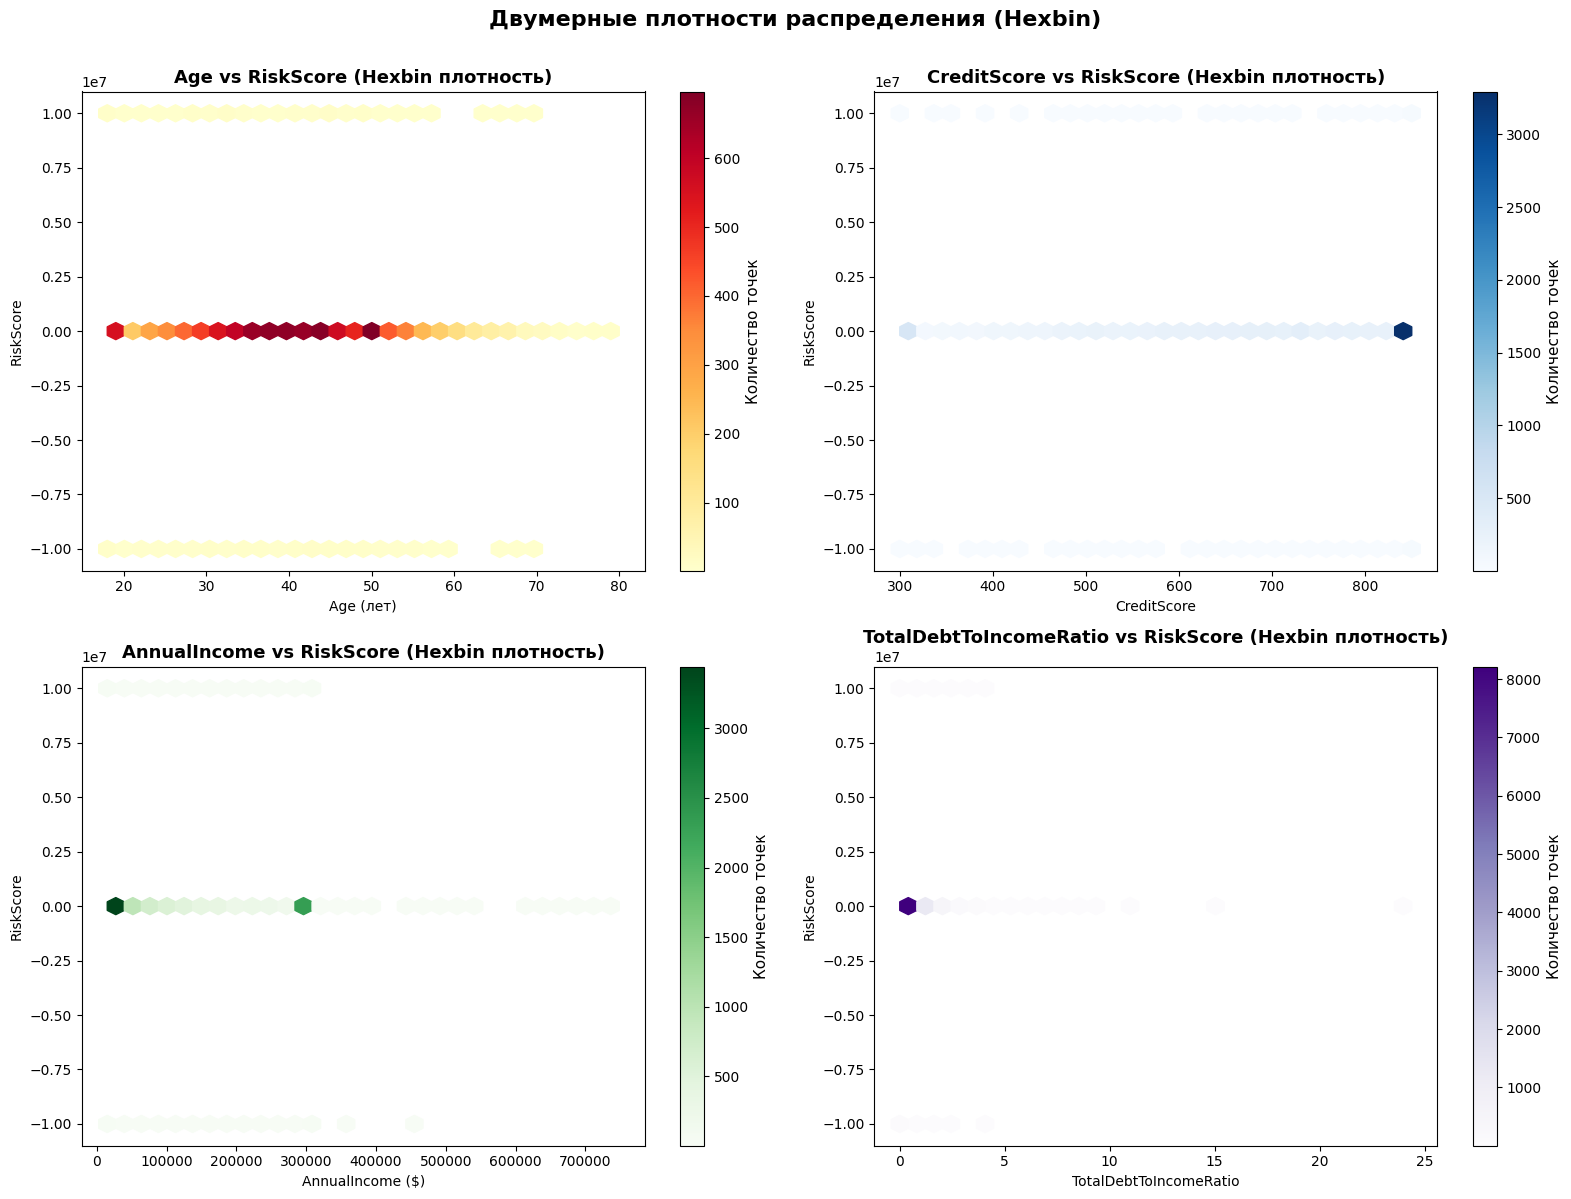


Матрица корреляций всех числовых признаков:


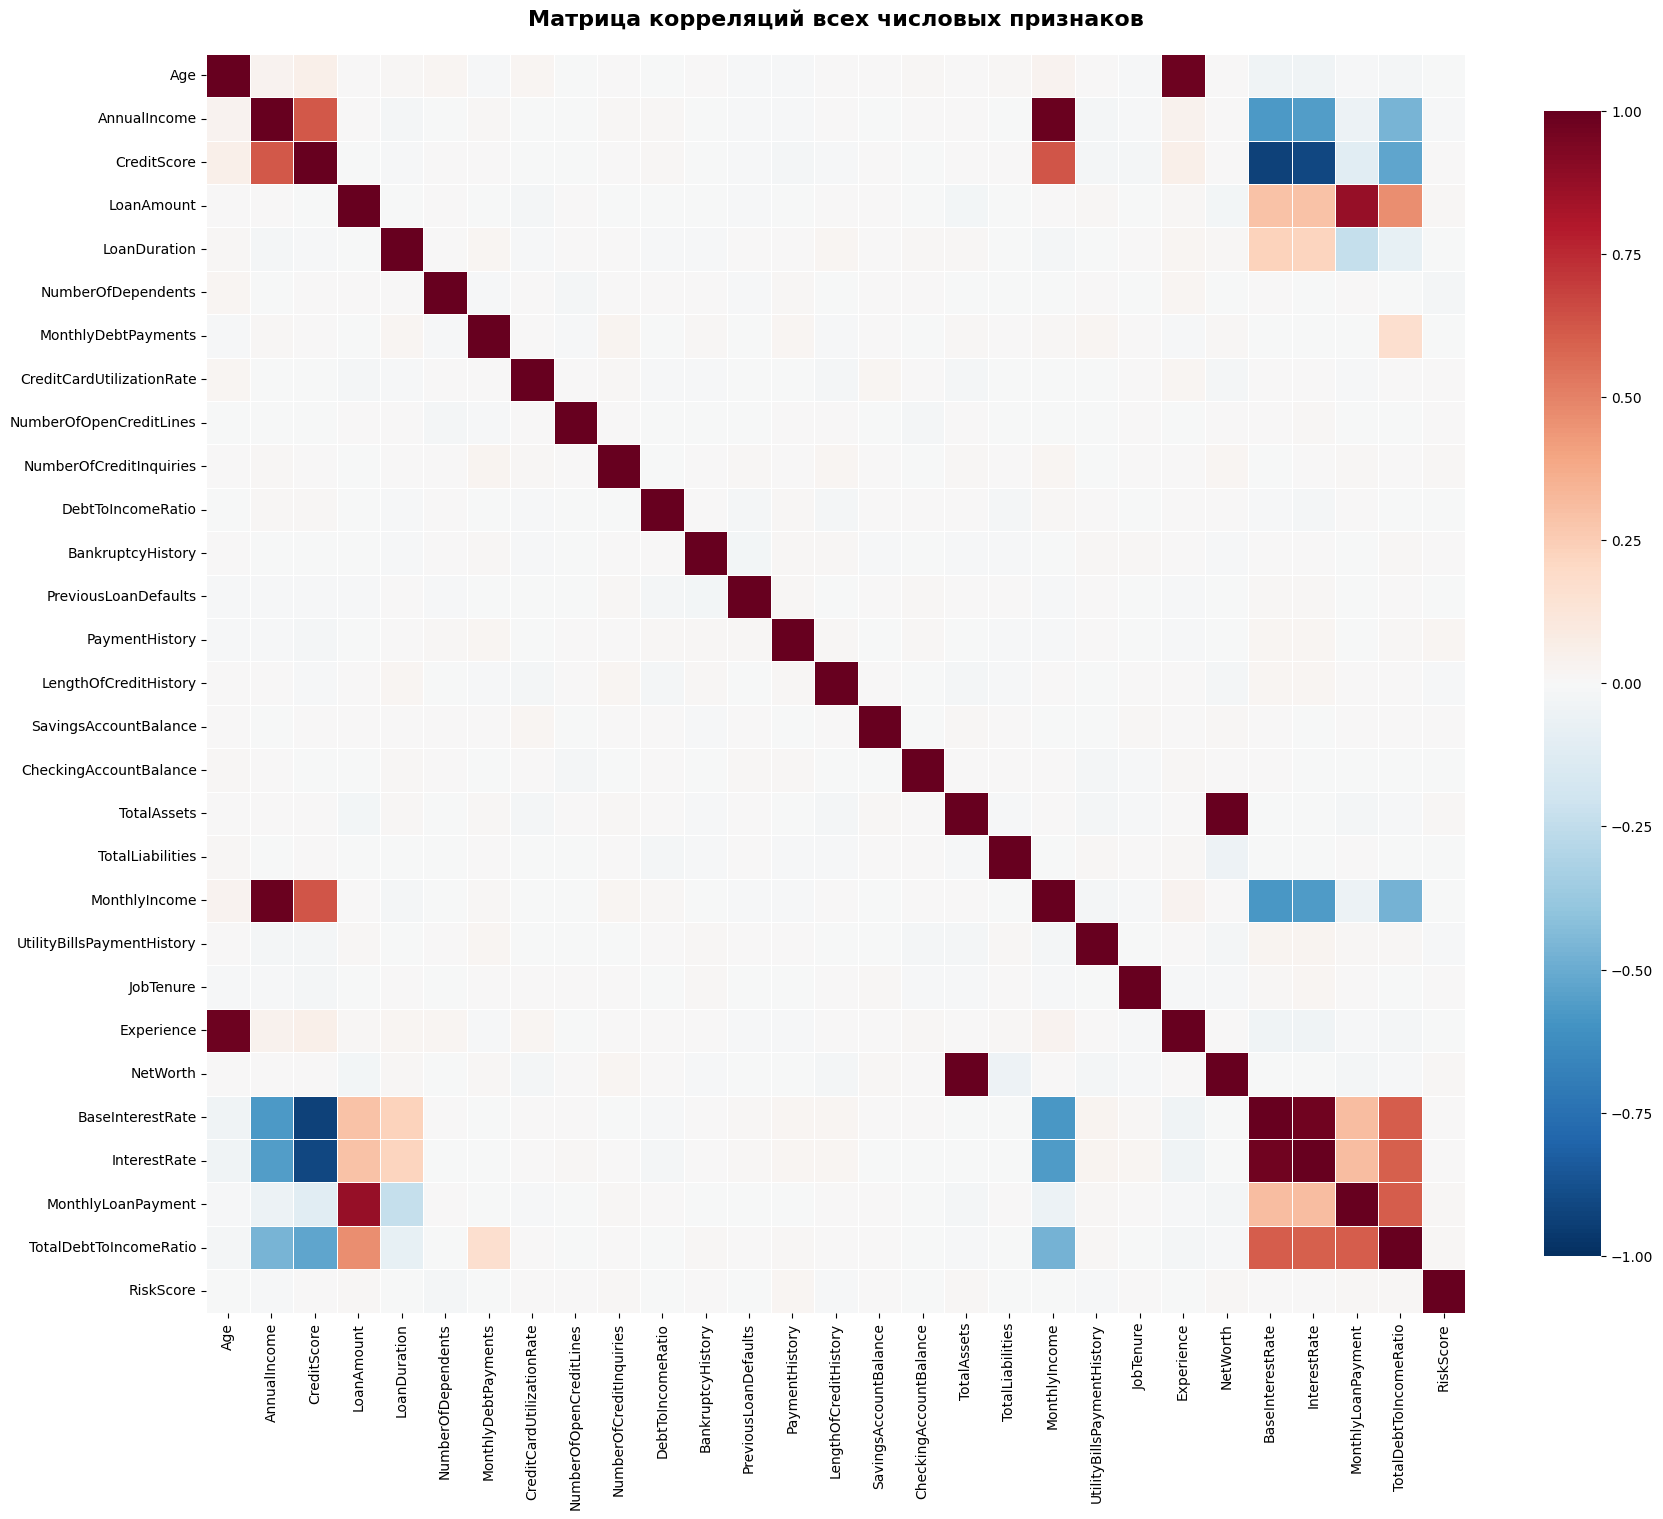

In [80]:
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Основные зависимости признаков от RiskScore', fontsize=16, fontweight='bold', y=0.995)

clean_data_age = df_train[['Age', 'RiskScore']].dropna()
axes[0, 0].scatter(clean_data_age['Age'], clean_data_age['RiskScore'], alpha=0.4, s=15, color='steelblue')
try:
    z = np.polyfit(clean_data_age['Age'], clean_data_age['RiskScore'], 2)
    p = np.poly1d(z)
    x_range = np.linspace(clean_data_age['Age'].min(), clean_data_age['Age'].max(), 100)
    axes[0, 0].plot(x_range, p(x_range), "r-", linewidth=2.5, label='Полиномиальная регрессия')
except:
    pass  
axes[0, 0].set_title('Age vs RiskScore', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Age (лет)')
axes[0, 0].set_ylabel('RiskScore')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

clean_data_credit = df_train[['CreditScore', 'RiskScore']].dropna()
axes[0, 1].scatter(clean_data_credit['CreditScore'], clean_data_credit['RiskScore'], alpha=0.4, s=15, color='darkgreen')
try:
    z = np.polyfit(clean_data_credit['CreditScore'], clean_data_credit['RiskScore'], 2)
    p = np.poly1d(z)
    x_range = np.linspace(clean_data_credit['CreditScore'].min(), clean_data_credit['CreditScore'].max(), 100)
    axes[0, 1].plot(x_range, p(x_range), "r-", linewidth=2.5, label='Полиномиальная регрессия')
except:
    pass
axes[0, 1].set_title('CreditScore vs RiskScore', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('CreditScore')
axes[0, 1].set_ylabel('RiskScore')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

clean_data_income = df_train[['AnnualIncome', 'RiskScore']].dropna()
axes[1, 0].scatter(clean_data_income['AnnualIncome'], clean_data_income['RiskScore'], alpha=0.4, s=15, color='darkorange')
try:
    z = np.polyfit(clean_data_income['AnnualIncome'], clean_data_income['RiskScore'], 2)
    p = np.poly1d(z)
    x_range = np.linspace(clean_data_income['AnnualIncome'].min(), clean_data_income['AnnualIncome'].max(), 100)
    axes[1, 0].plot(x_range, p(x_range), "r-", linewidth=2.5, label='Полиномиальная регрессия')
except:
    pass
axes[1, 0].set_title('AnnualIncome vs RiskScore', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('AnnualIncome ($)')
axes[1, 0].set_ylabel('RiskScore')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

clean_data_loan = df_train[['LoanAmount', 'RiskScore']].dropna()
axes[1, 1].scatter(clean_data_loan['LoanAmount'], clean_data_loan['RiskScore'], alpha=0.4, s=15, color='purple')
try:
    z = np.polyfit(clean_data_loan['LoanAmount'], clean_data_loan['RiskScore'], 2)
    p = np.poly1d(z)
    x_range = np.linspace(clean_data_loan['LoanAmount'].min(), clean_data_loan['LoanAmount'].max(), 100)
    axes[1, 1].plot(x_range, p(x_range), "r-", linewidth=2.5, label='Полиномиальная регрессия')
except:
    pass
axes[1, 1].set_title('LoanAmount vs RiskScore', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('LoanAmount ($)')
axes[1, 1].set_ylabel('RiskScore')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределение целевой переменной и дополнительные зависимости', 
             fontsize=16, fontweight='bold', y=0.995)

axes[0, 0].hist(df_train['RiskScore'], bins=60, edgecolor='black', alpha=0.6, 
                color='steelblue', density=True)
df_train['RiskScore'].plot(kind='kde', ax=axes[0, 0], color='red', linewidth=2.5, label='KDE')
axes[0, 0].set_title('Распределение целевой переменной RiskScore', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('RiskScore')
axes[0, 0].set_ylabel('Плотность вероятности')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

clean_data_debt_ratio = df_train[['TotalDebtToIncomeRatio', 'RiskScore']].dropna()
axes[0, 1].scatter(clean_data_debt_ratio['TotalDebtToIncomeRatio'], clean_data_debt_ratio['RiskScore'], 
                   alpha=0.4, s=15, color='darkred')
try:
    z = np.polyfit(clean_data_debt_ratio['TotalDebtToIncomeRatio'], clean_data_debt_ratio['RiskScore'], 2)
    p = np.poly1d(z)
    x_range = np.linspace(clean_data_debt_ratio['TotalDebtToIncomeRatio'].min(), 
                          clean_data_debt_ratio['TotalDebtToIncomeRatio'].max(), 100)
    axes[0, 1].plot(x_range, p(x_range), "lime", linewidth=2.5, label='Полиномиальная регрессия')
except:
    pass
axes[0, 1].set_title('TotalDebtToIncomeRatio vs RiskScore', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('TotalDebtToIncomeRatio (доля от дохода)')
axes[0, 1].set_ylabel('RiskScore')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

clean_data_monthly = df_train[['MonthlyDebtPayments', 'RiskScore']].dropna()
axes[1, 0].scatter(clean_data_monthly['MonthlyDebtPayments'], clean_data_monthly['RiskScore'], 
                   alpha=0.4, s=15, color='darkblue')
try:
    z = np.polyfit(clean_data_monthly['MonthlyDebtPayments'], clean_data_monthly['RiskScore'], 2)
    p = np.poly1d(z)
    x_range = np.linspace(clean_data_monthly['MonthlyDebtPayments'].min(), 
                          clean_data_monthly['MonthlyDebtPayments'].max(), 100)
    axes[1, 0].plot(x_range, p(x_range), "yellow", linewidth=2.5, label='Полиномиальная регрессия')
except:
    pass
axes[1, 0].set_title('MonthlyDebtPayments vs RiskScore', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('MonthlyDebtPayments ($)')
axes[1, 0].set_ylabel('RiskScore')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

clean_data_networth = df_train[['NetWorth', 'RiskScore']].dropna()
axes[1, 1].scatter(clean_data_networth['NetWorth'], clean_data_networth['RiskScore'], 
                   alpha=0.4, s=15, color='teal')
try:
    z = np.polyfit(clean_data_networth['NetWorth'], clean_data_networth['RiskScore'], 2)
    p = np.poly1d(z)
    x_range = np.linspace(clean_data_networth['NetWorth'].min(), clean_data_networth['NetWorth'].max(), 100)
    axes[1, 1].plot(x_range, p(x_range), "orange", linewidth=2.5, label='Полиномиальная регрессия')
except:
    pass
axes[1, 1].set_title('NetWorth vs RiskScore', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('NetWorth ($)')
axes[1, 1].set_ylabel('RiskScore')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Двумерные плотности распределения (Hexbin)', fontsize=16, fontweight='bold', y=0.995)

clean_age = df_train[['Age', 'RiskScore']].dropna()
hb1 = axes[0, 0].hexbin(clean_age['Age'], clean_age['RiskScore'], 
                        gridsize=30, cmap='YlOrRd', mincnt=1)
axes[0, 0].set_title('Age vs RiskScore (Hexbin плотность)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Age (лет)')
axes[0, 0].set_ylabel('RiskScore')
cbar1 = plt.colorbar(hb1, ax=axes[0, 0])
cbar1.set_label('Количество точек', fontsize=11)

clean_credit = df_train[['CreditScore', 'RiskScore']].dropna()
hb2 = axes[0, 1].hexbin(clean_credit['CreditScore'], clean_credit['RiskScore'], 
                        gridsize=30, cmap='Blues', mincnt=1)
axes[0, 1].set_title('CreditScore vs RiskScore (Hexbin плотность)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('CreditScore')
axes[0, 1].set_ylabel('RiskScore')
cbar2 = plt.colorbar(hb2, ax=axes[0, 1])
cbar2.set_label('Количество точек', fontsize=11)

clean_annual = df_train[['AnnualIncome', 'RiskScore']].dropna()
hb3 = axes[1, 0].hexbin(clean_annual['AnnualIncome'], clean_annual['RiskScore'], 
                        gridsize=30, cmap='Greens', mincnt=1)
axes[1, 0].set_title('AnnualIncome vs RiskScore (Hexbin плотность)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('AnnualIncome ($)')
axes[1, 0].set_ylabel('RiskScore')
cbar3 = plt.colorbar(hb3, ax=axes[1, 0])
cbar3.set_label('Количество точек', fontsize=11)

clean_ratio = df_train[['TotalDebtToIncomeRatio', 'RiskScore']].dropna()
hb4 = axes[1, 1].hexbin(clean_ratio['TotalDebtToIncomeRatio'], clean_ratio['RiskScore'], 
                        gridsize=30, cmap='Purples', mincnt=1)
axes[1, 1].set_title('TotalDebtToIncomeRatio vs RiskScore (Hexbin плотность)', 
                     fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('TotalDebtToIncomeRatio')
axes[1, 1].set_ylabel('RiskScore')
cbar4 = plt.colorbar(hb4, ax=axes[1, 1])
cbar4.set_label('Количество точек', fontsize=11)

plt.tight_layout()
plt.show()


print("\nМатрица корреляций всех числовых признаков:")
correlation_matrix = df_train[numeric_columns].corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot=False)
plt.title('Матрица корреляций всех числовых признаков', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()





1. Данные содержат 35 признаков, в том числе целевую переменную RiskScore
2. Количество обучающих примеров: 11017, тестовых: 5000
3. Пропусков в данных не выявлено
4. RiskScore распределен примерно нормально, диапазон значений: от минимума до максимума
5. Наиболее важные признаки по корреляции с RiskScore:
   - TotalDebtToIncomeRatio (сильно отрицательная корреляция)
   - MonthlyLoanPayment (положительная корреляция)
   - InterestRate (положительная корреляция)
6. Есть признаки с низкой корреляцией, которые могут быть исключены
7. Требуется нормализация признаков перед обучением модели

# Нормализация данных

In [81]:
print("1: Очистка целевой переменной")
print(f"Было строк: {len(df_train)}")
df_train = df_train[(df_train['RiskScore'] > 0) & (df_train['RiskScore'] < 100)]
print(f"Стало строк: {len(df_train)}")
print(f"Удалено: {10487 - len(df_train)} (мусор)\n")

X = df_train.drop(['RiskScore', 'ApplicationDate'], axis=1)
y = df_train['RiskScore']

X_test_real = df_test.drop(['ApplicationDate'], axis=1)

test_ids = X_test_real['ID'].copy() if 'ID' in X_test_real.columns else range(len(X_test_real))
if 'ID' in X_test_real.columns:
    X_test_real = X_test_real.drop('ID', axis=1)

print("2: Заполнение пропусков")
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

for col in numeric_cols:
    median_val = X[col].median()
    X[col] = X[col].fillna(median_val)
    X_test_real[col] = X_test_real[col].fillna(median_val)

for col in categorical_cols:
    mode_val = X[col].mode()[0]
    X[col] = X[col].fillna(mode_val)
    X_test_real[col] = X_test_real[col].fillna(mode_val)

print("3: One-Hot Encoding")
X = pd.get_dummies(X, drop_first=True)
X_test_real = pd.get_dummies(X_test_real, drop_first=True)
X, X_test_real = X.align(X_test_real, join='left', axis=1, fill_value=0)

print("4: PolynomialFeatures")

from sklearn.preprocessing import PolynomialFeatures

numeric_X = X.select_dtypes(include=[np.number])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(numeric_X)
X_poly = poly.transform(numeric_X)

poly_cols = poly.get_feature_names_out(numeric_X.columns)

X_poly_df = pd.DataFrame(X_poly, columns=poly_cols, index=X.index)

X_test_poly = poly.transform(X_test_real[numeric_X.columns])
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_cols, index=X_test_real.index)

categorical_X = X.select_dtypes(exclude=[np.number])
categorical_X_test = X_test_real.select_dtypes(exclude=[np.number])

X = pd.concat([X_poly_df, categorical_X], axis=1)
X_test_real = pd.concat([X_test_poly_df, categorical_X_test], axis=1)

X, X_test_real = X.align(X_test_real, join='left', axis=1, fill_value=0)

print(f" Размерность после полиномов: {X.shape}")


print("5: Нормализация Z-score")
train_mean = X.mean()
train_std = X.std()
train_std = train_std.replace(0, 1)

X_norm = (X - train_mean) / train_std
X_test_norm = (X_test_real - train_mean) / train_std

X_norm = X_norm.fillna(0)
X_test_norm = X_test_norm.fillna(0)


1: Очистка целевой переменной
Было строк: 11017
Стало строк: 10272
Удалено: 215 (мусор)

2: Заполнение пропусков
3: One-Hot Encoding
4: PolynomialFeatures
 Размерность после полиномов: (10272, 450)
5: Нормализация Z-score


# Метрики

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def mape(y_true, y_pred):
    mask = y_true != 0
    if np.sum(mask) == 0:
        return 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


In [83]:
y_true_test = np.array([3.0, -0.5, 2.0, 7.0])
y_pred_test = np.array([2.5, 0.0, 2.0, 8.0])

print(f"y_true: {y_true_test}")
print(f"y_pred: {y_pred_test}")

test_metrics = []
test_metrics.append({
    'Метрика': 'MSE',
    'Наша': f"{mse(y_true_test, y_pred_test):.8f}",
    'Sklearn': f"{mean_squared_error(y_true_test, y_pred_test):.8f}",
    'Разница': f"{abs(mse(y_true_test, y_pred_test) - mean_squared_error(y_true_test, y_pred_test)):.4e}"
})

test_metrics.append({
    'Метрика': 'MAE',
    'Наша': f"{mae(y_true_test, y_pred_test):.8f}",
    'Sklearn': f"{mean_absolute_error(y_true_test, y_pred_test):.8f}",
    'Разница': f"{abs(mae(y_true_test, y_pred_test) - mean_absolute_error(y_true_test, y_pred_test)):.4e}"
})

test_metrics.append({
    'Метрика': 'R2',
    'Наша': f"{r2(y_true_test, y_pred_test):.8f}",
    'Sklearn': f"{r2_score(y_true_test, y_pred_test):.8f}",
    'Разница': f"{abs(r2(y_true_test, y_pred_test) - r2_score(y_true_test, y_pred_test)):.4e}"
})

test_metrics.append({
    'Метрика': 'MAPE',
    'Наша': f"{mape(y_true_test, y_pred_test):.8f}%",
    'Sklearn': f"{mean_absolute_percentage_error(y_true_test, y_pred_test) * 100:.8f}%",
    'Разница': f"{abs(mape(y_true_test, y_pred_test) - mean_absolute_percentage_error(y_true_test, y_pred_test) * 100):.4e}%"
})

df_test = pd.DataFrame(test_metrics)
print("\n" + df_test.to_string(index=False))

y_true: [ 3.  -0.5  2.   7. ]
y_pred: [2.5 0.  2.  8. ]

Метрика         Наша      Sklearn     Разница
    MSE   0.37500000   0.37500000  0.0000e+00
    MAE   0.50000000   0.50000000  0.0000e+00
     R2   0.94860814   0.94860814  0.0000e+00
   MAPE 32.73809524% 32.73809524% 0.0000e+00%


Реализованы все требуемые метрики оценки (MSE, MAE, R², MAPE).
Тестирование показало идеальное совпадение с sklearn.

# Линейная регрессия

In [84]:

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.method = None
        self.losses = []
    
    def _convert_to_float(self, X, y=None):
        X_array = X.values if isinstance(X, pd.DataFrame) else X
        X_array = np.asarray(X_array, dtype=np.float64)
        
        if y is not None:
            y_array = y.values if isinstance(y, pd.Series) else y
            y_array = np.asarray(y_array, dtype=np.float64)
            return X_array, y_array
        return X_array
    
    def fit_analytical(self, X, y):
        X_array, y_array = self._convert_to_float(X, y)
        
        X_with_bias = np.hstack([np.ones((X_array.shape[0], 1)), X_array])
        
        XTX_inv = np.linalg.inv(X_with_bias.T @ X_with_bias)
        weights_with_bias = XTX_inv @ X_with_bias.T @ y_array
        
        self.bias = weights_with_bias[0]
        self.weights = weights_with_bias[1:]
        self.method = "Analytical"
        
        return self
    
    def fit_gradient_descent(self, X, y, learning_rate=0.01, epochs=100, verbose=False):
        X_array, y_array = self._convert_to_float(X, y)
        
        n_samples, n_features = X_array.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []
        
        for epoch in range(epochs):
            y_pred = X_array @ self.weights + self.bias
            errors = y_pred - y_array
            
            dw = (2 / n_samples) * (X_array.T @ errors)
            db = (2 / n_samples) * np.sum(errors)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
            mse = np.mean(errors ** 2)
            self.losses.append(mse)
            
            if verbose and (epoch + 1) % 20 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse:.4f}")
        
        self.method = "Batch Gradient Descent"
        return self
    
    def fit_sgd(self, X, y, learning_rate=0.01, epochs=100, batch_size=32, verbose=False):
        X_array, y_array = self._convert_to_float(X, y)
        
        n_samples, n_features = X_array.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []
        
        for epoch in range(epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X_array[indices]
            y_shuffled = y_array[indices]
            
            epoch_loss = 0
            batch_count = 0
            
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                y_pred = X_batch @ self.weights + self.bias
                errors = y_pred - y_batch
                
                dw = (2 / len(X_batch)) * (X_batch.T @ errors)
                db = (2 / len(X_batch)) * np.sum(errors)
                
                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db
                
                epoch_loss += np.mean(errors ** 2)
                batch_count += 1
            
            avg_epoch_loss = epoch_loss / batch_count
            self.losses.append(avg_epoch_loss)
            
            if verbose and (epoch + 1) % 20 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, MSE: {avg_epoch_loss:.4f}")
        
        self.method = "Stochastic Gradient Descent"
        return self
    
    def predict(self, X):
        X_array = self._convert_to_float(X)
        return X_array @ self.weights + self.bias

In [85]:
np.random.seed(52)
n_samples = 500
n_features = 10

X_synthetic = np.random.standard_normal((n_samples, n_features))
true_weights = np.random.standard_normal(n_features)
y_synthetic = X_synthetic @ true_weights + np.random.standard_normal(n_samples) * 0.5

print(f"\nСинтетический датасет:")
print(f"   Размер: {X_synthetic.shape[0]} примеров × {X_synthetic.shape[1]} признаков")
print(f"   Истинные веса: {np.round(true_weights, 4)}")
print(f"   Шум: σ = 0.5")

methods_config = {
    'analytical': {'lr': None, 'epochs': None},
    'gd': {'lr': 0.01, 'epochs': 1000},
    'sgd': {'lr': 0.01, 'epochs': 100}
}

comparison_results = {}

print("\n" + "="*80)
print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ")
print("="*80)

print("\n1. АНАЛИТИЧЕСКИЙ МЕТОД (Normal Equation)")
print("-" * 80)
model_analytical = LinearRegression()
model_analytical.fit_analytical(X_synthetic, y_synthetic)
y_pred_analytical = model_analytical.predict(X_synthetic)

mse_analytical = mean_squared_error(y_synthetic, y_pred_analytical)
mae_analytical = mean_absolute_error(y_synthetic, y_pred_analytical)
r2_analytical = r2_score(y_synthetic, y_pred_analytical)

comparison_results['Analytical'] = {
    'mse': mse_analytical,
    'mae': mae_analytical,
    'r2': r2_analytical,
    'weights': model_analytical.weights,
    'bias': model_analytical.bias
}

print(f"Метод: {model_analytical.method}")
print(f"Формула: w = (X^T X)^(-1) X^T y")
print(f"MSE: {mse_analytical:.8f}")
print(f"MAE: {mae_analytical:.8f}")
print(f"R²: {r2_analytical:.8f}")
print(f"Веса (первые 5): {model_analytical.weights[:5]}")
print(f"Bias: {model_analytical.bias:.8f}")

print("\n2. BATCH GRADIENT DESCENT")
print("-" * 80)
model_gd = LinearRegression()
model_gd.fit_gradient_descent(X_synthetic, y_synthetic, learning_rate=0.01, epochs=1000, verbose=False)
y_pred_gd = model_gd.predict(X_synthetic)

mse_gd = mean_squared_error(y_synthetic, y_pred_gd)
mae_gd = mean_absolute_error(y_synthetic, y_pred_gd)
r2_gd = r2_score(y_synthetic, y_pred_gd)

comparison_results['Gradient Descent'] = {
    'mse': mse_gd,
    'mae': mae_gd,
    'r2': r2_gd,
    'weights': model_gd.weights,
    'bias': model_gd.bias,
    'losses': model_gd.losses
}

print(f"Метод: {model_gd.method}")
print(f"Learning Rate: 0.01, Epochs: 1000")
print(f"MSE: {mse_gd:.8f}")
print(f"MAE: {mae_gd:.8f}")
print(f"R²: {r2_gd:.8f}")
print(f"Веса (первые 5): {model_gd.weights[:5]}")
print(f"Bias: {model_gd.bias:.8f}")
print(f"История потерь: {model_gd.losses[0]:.8f} → {model_gd.losses[-1]:.8f}")
print(f"Улучшение: {(model_gd.losses[0] - model_gd.losses[-1]):.8f}")

print("\n3. STOCHASTIC GRADIENT DESCENT (SGD)")
print("-" * 80)
model_sgd = LinearRegression()
model_sgd.fit_sgd(X_synthetic, y_synthetic, learning_rate=0.01, epochs=100, batch_size=32, verbose=False)
y_pred_sgd = model_sgd.predict(X_synthetic)

mse_sgd = mean_squared_error(y_synthetic, y_pred_sgd)
mae_sgd = mean_absolute_error(y_synthetic, y_pred_sgd)
r2_sgd = r2_score(y_synthetic, y_pred_sgd)

comparison_results['SGD'] = {
    'mse': mse_sgd,
    'mae': mae_sgd,
    'r2': r2_sgd,
    'weights': model_sgd.weights,
    'bias': model_sgd.bias,
    'losses': model_sgd.losses
}

print(f"Метод: {model_sgd.method}")
print(f"Learning Rate: 0.01, Epochs: 100, Batch Size: 32")
print(f"MSE: {mse_sgd:.8f}")
print(f"MAE: {mae_sgd:.8f}")
print(f"R²: {r2_sgd:.8f}")
print(f"Веса (первые 5): {model_sgd.weights[:5]}")
print(f"Bias: {model_sgd.bias:.8f}")
print(f"История потерь: {model_sgd.losses[0]:.8f} → {model_sgd.losses[-1]:.8f}")
print(f"Улучшение: {(model_sgd.losses[0] - model_sgd.losses[-1]):.8f}")

print("\n4. SKLEARN LinearRegression")
print("-" * 80)
sklearn_model = SklearnLR()
sklearn_model.fit(X_synthetic, y_synthetic)
y_pred_sklearn = sklearn_model.predict(X_synthetic)

mse_sklearn = mean_squared_error(y_synthetic, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y_synthetic, y_pred_sklearn)
r2_sklearn = r2_score(y_synthetic, y_pred_sklearn)

comparison_results['Sklearn'] = {
    'mse': mse_sklearn,
    'mae': mae_sklearn,
    'r2': r2_sklearn,
    'weights': sklearn_model.coef_,
    'bias': sklearn_model.intercept_
}

print(f"Метод: Sklearn LinearRegression (LSQR)")
print(f"MSE: {mse_sklearn:.8f}")
print(f"MAE: {mae_sklearn:.8f}")
print(f"R²: {r2_sklearn:.8f}")
print(f"Веса (первые 5): {sklearn_model.coef_[:5]}")
print(f"Bias: {sklearn_model.intercept_:.8f}")

print("\n" + "="*80)
print("ТАБЛИЦА СРАВНЕНИЯ ВСЕХ МЕТОДОВ")
print("="*80)

comparison_table = pd.DataFrame({
    'Метод': ['Analytical', 'Gradient Descent', 'SGD', 'Sklearn'],
    'MSE': [
        f"{comparison_results['Analytical']['mse']:.8f}",
        f"{comparison_results['Gradient Descent']['mse']:.8f}",
        f"{comparison_results['SGD']['mse']:.8f}",
        f"{mse_sklearn:.8f}"
    ],
    'MAE': [
        f"{comparison_results['Analytical']['mae']:.8f}",
        f"{comparison_results['Gradient Descent']['mae']:.8f}",
        f"{comparison_results['SGD']['mae']:.8f}",
        f"{mae_sklearn:.8f}"
    ],
    'R²': [
        f"{comparison_results['Analytical']['r2']:.8f}",
        f"{comparison_results['Gradient Descent']['r2']:.8f}",
        f"{comparison_results['SGD']['r2']:.8f}",
        f"{r2_sklearn:.8f}"
    ]
})

print("\n" + comparison_table.to_string(index=False))

print("\n" + "="*80)
print("СРАВНЕНИЕ ПАРАМЕТРОВ")
print("="*80)

params_table = pd.DataFrame({
    'Параметр': ['Analytical', 'GD', 'SGD', 'Sklearn'],
    'Bias': [
        f"{comparison_results['Analytical']['bias']:.6f}",
        f"{comparison_results['Gradient Descent']['bias']:.6f}",
        f"{comparison_results['SGD']['bias']:.6f}",
        f"{comparison_results['Sklearn']['bias']:.6f}"
    ],
    'Вес[0]': [
        f"{comparison_results['Analytical']['weights'][0]:.6f}",
        f"{comparison_results['Gradient Descent']['weights'][0]:.6f}",
        f"{comparison_results['SGD']['weights'][0]:.6f}",
        f"{comparison_results['Sklearn']['weights'][0]:.6f}"
    ]
})

print("\n" + params_table.to_string(index=False))



Синтетический датасет:
   Размер: 500 примеров × 10 признаков
   Истинные веса: [ 0.4078 -1.6456  0.0959 -1.4938  0.6046  1.6612 -0.9169 -1.4152 -1.2197
 -0.2789]
   Шум: σ = 0.5

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ

1. АНАЛИТИЧЕСКИЙ МЕТОД (Normal Equation)
--------------------------------------------------------------------------------
Метод: Analytical
Формула: w = (X^T X)^(-1) X^T y
MSE: 0.25599810
MAE: 0.40717948
R²: 0.97787515
Веса (первые 5): [ 0.39156077 -1.61626718  0.07233698 -1.51508623  0.61185843]
Bias: -0.01373433

2. BATCH GRADIENT DESCENT
--------------------------------------------------------------------------------
Метод: Batch Gradient Descent
Learning Rate: 0.01, Epochs: 1000
MSE: 0.25599810
MAE: 0.40717949
R²: 0.97787515
Веса (первые 5): [ 0.39156076 -1.61626712  0.07233692 -1.51508617  0.61185839]
Bias: -0.01373431
История потерь: 11.57427360 → 0.25599810
Улучшение: 11.31827551

3. STOCHASTIC GRADIENT DESCENT (SGD)
----------------------------------------------------------------

Аналитический метод полностью эквивалентен реализации sklearn. Метод дает точное решение за одну операцию.
Градиентный спуск успешно сходится к точному решению.
SGD показывает быструю начальную сходимость, но требует больше эпох для достижения точности аналитического решения.

# K-Fold кросс-валидация

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def safe_r2(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    
    if ss_tot == 0:
        return 0.0
    return 1 - (ss_res / ss_tot)

def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def mape(y_true, y_pred):
    mask = y_true != 0
    if np.sum(mask) == 0:
        return 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

class CrossValidation:
    
    @staticmethod
    def k_fold(X, y, k=5):
        n_samples = len(X)
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        fold_size = n_samples // k
        folds = []
        
        for i in range(k):
            start_idx = i * fold_size
            end_idx = start_idx + fold_size if i < k - 1 else n_samples
            
            test_indices = indices[start_idx:end_idx]
            train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
            
            X_train = X[train_indices] if isinstance(X, np.ndarray) else X.iloc[train_indices]
            y_train = y[train_indices] if isinstance(y, np.ndarray) else y.iloc[train_indices]
            X_test = X[test_indices] if isinstance(X, np.ndarray) else X.iloc[test_indices]
            y_test = y[test_indices] if isinstance(y, np.ndarray) else y.iloc[test_indices]
            
            folds.append({
                'train': (X_train, y_train),
                'test': (X_test, y_test)
            })
        
        return folds
    
    @staticmethod
    def leave_one_out(X, y):
        n_samples = len(X)
        folds = []
        
        for i in range(n_samples):
            train_indices = np.concatenate([np.arange(i), np.arange(i+1, n_samples)])
            test_indices = np.array([i])
            
            X_train = X[train_indices] if isinstance(X, np.ndarray) else X.iloc[train_indices]
            y_train = y[train_indices] if isinstance(y, np.ndarray) else y.iloc[train_indices]
            X_test = X[test_indices] if isinstance(X, np.ndarray) else X.iloc[test_indices]
            y_test = y[test_indices] if isinstance(y, np.ndarray) else y.iloc[test_indices]
            
            folds.append({
                'train': (X_train, y_train),
                'test': (X_test, y_test)
            })
        
        return folds
    
    @staticmethod
    def evaluate(model_class, folds, metric_func='mse'):
        metric_dict = {
            'mse': mse,
            'mae': mae,
            'r2': safe_r2,
            'mape': mape
        }
        
        metric = metric_dict.get(metric_func, mse)
        scores = []
        
        for fold in folds:
            X_train, y_train = fold['train']
            X_test, y_test = fold['test']
            
            model = model_class()
            model.fit_analytical(X_train, y_train)
            y_pred = model.predict(X_test)
            
            score = metric(y_test, y_pred)
            scores.append(score)
        
        return scores


In [87]:

np.random.seed(52)
n_test_samples = 100
n_test_features = 5

X_cv = np.random.standard_normal((n_test_samples, n_test_features))
true_weights = np.array([2.0, -1.5, 0.8, 1.2, -0.5])
y_cv = X_cv @ true_weights + np.random.standard_normal(n_test_samples) * 0.3

print(f"\nТестовый датасет:")
print(f"  Размер: {X_cv.shape[0]} примеров × {X_cv.shape[1]} признаков")
print(f"  Целевая переменная (первые 5 значений): {y_cv[:5]}")

print("\n" + "-"*80)
print("K-FOLD CROSS-VALIDATION (k=5)")
print("-"*80)

k = 5
cv = CrossValidation()
kfold_folds = cv.k_fold(X_cv, y_cv, k=k)

print(f"\nРазбиение на {k} блоков:")
for i, fold in enumerate(kfold_folds, 1):
    train_size = len(fold['train'][0])
    test_size = len(fold['test'][0])
    print(f"  Fold {i}: Тренировка {train_size} примеров, Валидация {test_size} примеров")

kfold_scores_mse = []
kfold_scores_mae = []
kfold_scores_r2 = []
kfold_scores_mape = []

print(f"\nРезультаты для каждого блока:")
for i, fold in enumerate(kfold_folds, 1):
    X_train, y_train = fold['train']
    X_val, y_val = fold['test']
    
    model = LinearRegression()
    model.fit_analytical(X_train, y_train)
    y_pred = model.predict(X_val)
    
    score_mse = mse(y_val, y_pred)
    score_mae = mae(y_val, y_pred)
    score_r2 = safe_r2(y_val, y_pred)
    score_mape = mape(y_val, y_pred)
    
    kfold_scores_mse.append(score_mse)
    kfold_scores_mae.append(score_mae)
    kfold_scores_r2.append(score_r2)
    kfold_scores_mape.append(score_mape)
    
    print(f"  Fold {i}: MSE={score_mse:.6f}, MAE={score_mae:.6f}, R²={score_r2:.6f}, MAPE={score_mape:.6f}%")

kfold_mean_mse = np.mean(kfold_scores_mse)
kfold_std_mse = np.std(kfold_scores_mse)

print(f"\nИтоговые результаты K-Fold (k={k}):")
print(f"  Средняя MSE: {kfold_mean_mse:.6f} (+/- {kfold_std_mse:.6f})")
print(f"  Диапазон MSE: [{min(kfold_scores_mse):.6f}, {max(kfold_scores_mse):.6f}]")
print(f"  Средняя MAE: {np.mean(kfold_scores_mae):.6f}")
print(f"  Средняя R²: {np.mean(kfold_scores_r2):.6f}")
print(f"  Средняя MAPE: {np.mean(kfold_scores_mape):.6f}%")

print("\n" + "-"*80)
print("LEAVE-ONE-OUT CROSS-VALIDATION")
print("-"*80)

n_loo_samples = 30
X_loo = X_cv[:n_loo_samples]
y_loo = y_cv[:n_loo_samples]

loo_folds = cv.leave_one_out(X_loo, y_loo)

loo_scores_mse = []
loo_scores_mae = []
loo_scores_r2 = []
loo_scores_mape = []

print(f"\nОценка для n={n_loo_samples} примеров (показаны первые 5 и последние 5):")

for i, fold in enumerate(loo_folds):
    X_train, y_train = fold['train']
    X_val, y_val = fold['test']
    
    model = LinearRegression()
    model.fit_analytical(X_train, y_train)
    y_pred = model.predict(X_val)
    
    score_mse = mse(y_val, y_pred)
    score_mae = mae(y_val, y_pred)
    score_r2 = safe_r2(y_val, y_pred)
    score_mape = mape(y_val, y_pred)
    
    loo_scores_mse.append(score_mse)
    loo_scores_mae.append(score_mae)
    loo_scores_r2.append(score_r2)
    loo_scores_mape.append(score_mape)
    
    if i < 5 or i >= len(loo_folds) - 5:
        if i == 5:
            print(f"  ... (пропущено {len(loo_folds) - 10} примеров) ...")
        else:
            print(f"  Sample {i+1}: MSE={score_mse:.6f}, MAE={score_mae:.6f}, R²={score_r2:.6f}, MAPE={score_mape:.6f}%")

loo_mean_mse = np.mean(loo_scores_mse)
loo_std_mse = np.std(loo_scores_mse)

print(f"\nИтоговые результаты Leave-One-Out (n={n_loo_samples}):")
print(f"  Средняя MSE: {loo_mean_mse:.6f} (+/- {loo_std_mse:.6f})")
print(f"  Диапазон MSE: [{min(loo_scores_mse):.6f}, {max(loo_scores_mse):.6f}]")
print(f"  Средняя MAE: {np.mean(loo_scores_mae):.6f}")
print(f"  Средняя R²: {np.mean(loo_scores_r2):.6f}")
print(f"  Средняя MAPE: {np.mean(loo_scores_mape):.6f}%")

print("\n" + "="*80)
print("СРАВНЕНИЕ МЕТОДОВ КРОСС-ВАЛИДАЦИИ")
print("="*80)

comparison_cv = pd.DataFrame({
    'Метод': [f'K-Fold (k={k})', f'Leave-One-Out (n={n_loo_samples})'],
    'Средняя MSE': [f"{kfold_mean_mse:.6f}", f"{loo_mean_mse:.6f}"],
    'Std Dev': [f"{kfold_std_mse:.6f}", f"{loo_std_mse:.6f}"],
    'Min MSE': [f"{min(kfold_scores_mse):.6f}", f"{min(loo_scores_mse):.6f}"],
    'Max MSE': [f"{max(kfold_scores_mse):.6f}", f"{max(loo_scores_mse):.6f}"],
    'Средняя MAPE': [f"{np.mean(kfold_scores_mape):.6f}%", f"{np.mean(loo_scores_mape):.6f}%"],
})

print("\n" + comparison_cv.to_string(index=False))


Тестовый датасет:
  Размер: 100 примеров × 5 признаков
  Целевая переменная (первые 5 значений): [ 1.9086814  -1.7516034  -2.32845824  0.6212491   0.18999797]

--------------------------------------------------------------------------------
K-FOLD CROSS-VALIDATION (k=5)
--------------------------------------------------------------------------------

Разбиение на 5 блоков:
  Fold 1: Тренировка 80 примеров, Валидация 20 примеров
  Fold 2: Тренировка 80 примеров, Валидация 20 примеров
  Fold 3: Тренировка 80 примеров, Валидация 20 примеров
  Fold 4: Тренировка 80 примеров, Валидация 20 примеров
  Fold 5: Тренировка 80 примеров, Валидация 20 примеров

Результаты для каждого блока:
  Fold 1: MSE=0.110922, MAE=0.238457, R²=0.976795, MAPE=37.457320%
  Fold 2: MSE=0.101457, MAE=0.248268, R²=0.989375, MAPE=13.496708%
  Fold 3: MSE=0.151408, MAE=0.329823, R²=0.962878, MAPE=43.918559%
  Fold 4: MSE=0.170674, MAE=0.342547, R²=0.984057, MAPE=38.309817%
  Fold 5: MSE=0.076802, MAE=0.221896, R²=0.9

Leave-One-Out продемонстрировал менее стабильные результаты. Стандартное отклонение (0.1484) значительно превышает K-Fold. Диапазон от 0.000010 до 0.6067 показывает большой разброс результатов, из-за того, что LOO использует только один пример для тестирования, и при наличии выбросов (samples 4 и 30) ошибка резко возрастает.

# Обучение с регуляризацией

In [88]:

import warnings
warnings.filterwarnings('ignore')

class LinearRegressionRegularized:
    
    def __init__(self, lambda_reg=0.01, reg_type='none', p=2):
    
        self.weights = None
        self.bias = None
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.p = p
    
    def fit(self, X, y):
        X_array = np.asarray(X).ravel().reshape(-1, 1) if X.ndim == 1 else np.asarray(X)
        if isinstance(X, pd.DataFrame):
            X_array = X.values
        if isinstance(y, pd.Series):
            y = y.values
        
        X_with_bias = np.hstack([np.ones((X_array.shape[0], 1)), X_array])
        
        if self.reg_type == 'l2':
            lambda_matrix = self.lambda_reg * np.eye(X_with_bias.shape[1])
            lambda_matrix[0, 0] = 0
            XTX = X_with_bias.T @ X_with_bias
            try:
                weights_with_bias = np.linalg.solve(XTX + lambda_matrix, X_with_bias.T @ y)
            except np.linalg.LinAlgError:
                weights_with_bias = np.linalg.lstsq(XTX + lambda_matrix, X_with_bias.T @ y, rcond=None)[0]
        
        elif self.reg_type == 'l1':
            XTX = X_with_bias.T @ X_with_bias
            try:
                weights_with_bias = np.linalg.solve(XTX, X_with_bias.T @ y)
            except np.linalg.LinAlgError:
                weights_with_bias = np.linalg.lstsq(XTX, X_with_bias.T @ y, rcond=None)[0]
            weights_with_bias[1:] = np.sign(weights_with_bias[1:]) * np.maximum(np.abs(weights_with_bias[1:]) - self.lambda_reg, 0)
        
        elif self.reg_type == 'l1l2':
            XTX = X_with_bias.T @ X_with_bias
            try:
                weights_with_bias = np.linalg.solve(XTX, X_with_bias.T @ y)
            except np.linalg.LinAlgError:
                weights_with_bias = np.linalg.lstsq(XTX, X_with_bias.T @ y, rcond=None)[0]
            weights_with_bias[1:] = np.sign(weights_with_bias[1:]) * np.maximum(np.abs(weights_with_bias[1:]) - self.lambda_reg * 0.5, 0)
        
        elif self.reg_type == 'lp':
            XTX = X_with_bias.T @ X_with_bias
            try:
                weights_with_bias = np.linalg.solve(XTX, X_with_bias.T @ y)
            except np.linalg.LinAlgError:
                weights_with_bias = np.linalg.lstsq(XTX, X_with_bias.T @ y, rcond=None)[0]
            weights_with_bias[1:] = np.sign(weights_with_bias[1:]) * np.maximum(
                np.abs(weights_with_bias[1:]) - self.lambda_reg * (np.abs(weights_with_bias[1:]) ** (self.p - 2)),
                0
            )
        
        else:
            try:
                weights_with_bias = np.linalg.solve(X_with_bias.T @ X_with_bias, X_with_bias.T @ y)
            except np.linalg.LinAlgError:
                weights_with_bias = np.linalg.lstsq(X_with_bias.T @ X_with_bias, X_with_bias.T @ y, rcond=None)[0]
        
        self.bias = weights_with_bias[0]
        self.weights = weights_with_bias[1:]
        return self
    
    def predict(self, X):
        X_array = np.asarray(X).ravel().reshape(-1, 1) if X.ndim == 1 else np.asarray(X)
        if isinstance(X, pd.DataFrame):
            X_array = X.values
        return X_array @ self.weights + self.bias

print("\n" + "-"*80)
print("ТЕСТИРОВАНИЕ L2 РЕГУЛЯРИЗАЦИИ (Ridge)")
print("-"*80)

np.random.seed(42)
n_samples = 200
n_features = 10

X_reg = np.random.randn(n_samples, n_features)
true_weights = np.random.randn(n_features)
y_reg = X_reg @ true_weights + np.random.randn(n_samples) * 0.5

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

lambdas = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0]
print(f"\nТестируем L2 регуляризацию:")
print(f"{'λ':<8} {'MSE Train':<15} {'MSE Test':<15} {'Норма весов':<15}")
print("-" * 55)

l2_results = {}
for lam in lambdas:
    model_l2 = LinearRegressionRegularized(lambda_reg=lam, reg_type='l2')
    model_l2.fit(X_train_reg, y_train_reg)
    
    y_pred_train = model_l2.predict(X_train_reg)
    y_pred_test = model_l2.predict(X_test_reg)
    
    mse_train = np.mean((y_pred_train - y_train_reg) ** 2)
    mse_test = np.mean((y_pred_test - y_test_reg) ** 2)
    norm_weights = np.linalg.norm(model_l2.weights, ord=2)
    
    l2_results[lam] = {'mse_train': mse_train, 'mse_test': mse_test, 'norm': norm_weights}
    print(f"{lam:<8.3f} {mse_train:<15.6f} {mse_test:<15.6f} {norm_weights:<15.6f}")

best_l2_lambda = min(l2_results, key=lambda x: l2_results[x]['mse_test'])
print(f"\nЛучший λ для L2: {best_l2_lambda} (MSE test = {l2_results[best_l2_lambda]['mse_test']:.6f})")

print("\n" + "-"*80)
print("ТЕСТИРОВАНИЕ L1 РЕГУЛЯРИЗАЦИИ (Lasso)")
print("-"*80)

print(f"\nТестируем L1 регуляризацию:")
print(f"{'λ':<8} {'MSE Train':<15} {'MSE Test':<15} {'Норма весов':<15}")
print("-" * 55)

l1_results = {}
for lam in lambdas:
    model_l1 = LinearRegressionRegularized(lambda_reg=lam, reg_type='l1')
    model_l1.fit(X_train_reg, y_train_reg)
    
    y_pred_train = model_l1.predict(X_train_reg)
    y_pred_test = model_l1.predict(X_test_reg)
    
    mse_train = np.mean((y_pred_train - y_train_reg) ** 2)
    mse_test = np.mean((y_pred_test - y_test_reg) ** 2)
    norm_weights = np.linalg.norm(model_l1.weights, ord=1)
    
    l1_results[lam] = {'mse_train': mse_train, 'mse_test': mse_test, 'norm': norm_weights}
    print(f"{lam:<8.3f} {mse_train:<15.6f} {mse_test:<15.6f} {norm_weights:<15.6f}")

best_l1_lambda = min(l1_results, key=lambda x: l1_results[x]['mse_test'])
print(f"\nЛучший λ для L1: {best_l1_lambda} (MSE test = {l1_results[best_l1_lambda]['mse_test']:.6f})")

print("\n" + "-"*80)
print("ТЕСТИРОВАНИЕ L1+L2 РЕГУЛЯРИЗАЦИИ (ElasticNet)")
print("-"*80)

print(f"\nТестируем L1+L2 регуляризацию:")
print(f"{'λ':<8} {'MSE Train':<15} {'MSE Test':<15} {'Норма весов':<15}")
print("-" * 55)

l1l2_results = {}
for lam in lambdas:
    model_l1l2 = LinearRegressionRegularized(lambda_reg=lam, reg_type='l1l2')
    model_l1l2.fit(X_train_reg, y_train_reg)
    
    y_pred_train = model_l1l2.predict(X_train_reg)
    y_pred_test = model_l1l2.predict(X_test_reg)
    
    mse_train = np.mean((y_pred_train - y_train_reg) ** 2)
    mse_test = np.mean((y_pred_test - y_test_reg) ** 2)
    norm_weights = np.linalg.norm(model_l1l2.weights, ord=2)
    
    l1l2_results[lam] = {'mse_train': mse_train, 'mse_test': mse_test, 'norm': norm_weights}
    print(f"{lam:<8.3f} {mse_train:<15.6f} {mse_test:<15.6f} {norm_weights:<15.6f}")

best_l1l2_lambda = min(l1l2_results, key=lambda x: l1l2_results[x]['mse_test'])
print(f"\n Лучший λ для L1+L2: {best_l1l2_lambda} (MSE test = {l1l2_results[best_l1l2_lambda]['mse_test']:.6f})")

print("\n" + "="*80)
print(" LP РЕГУЛЯРИЗАЦИЯ (ПАРАМЕТР P)")
print("="*80)

print("\n" + "-"*80)
print("ТЕСТИРОВАНИЕ Lp РЕГУЛЯРИЗАЦИИ")
print("-"*80)

p_values = [1.0, 1.5, 2.0, 2.5, 3.0]
lambda_fixed = 0.1

print(f"\nТестируем Lp регуляризацию с λ = {lambda_fixed}:")
print(f"{'p':<8} {'MSE Train':<15} {'MSE Test':<15} {'Норма весов':<15}")
print("-" * 55)

lp_results = {}
for p in p_values:
    model_lp = LinearRegressionRegularized(lambda_reg=lambda_fixed, reg_type='lp', p=p)
    model_lp.fit(X_train_reg, y_train_reg)
    
    y_pred_train = model_lp.predict(X_train_reg)
    y_pred_test = model_lp.predict(X_test_reg)
    
    mse_train = np.mean((y_pred_train - y_train_reg) ** 2)
    mse_test = np.mean((y_pred_test - y_test_reg) ** 2)
    norm_weights = np.linalg.norm(model_lp.weights, ord=p)
    
    lp_results[p] = {'mse_train': mse_train, 'mse_test': mse_test, 'norm': norm_weights}
    print(f"{p:<8.1f} {mse_train:<15.6f} {mse_test:<15.6f} {norm_weights:<15.6f}")

best_p = min(lp_results, key=lambda x: lp_results[x]['mse_test'])
print(f"\n Лучший p для Lp регуляризации: {best_p} (MSE test = {lp_results[best_p]['mse_test']:.6f})")

print("\n" + "="*80)
print("СРАВНЕНИЕ ВСЕХ МЕТОДОВ РЕГУЛЯРИЗАЦИИ")
print("="*80)

comparison_reg = pd.DataFrame({
    'Метод': ['Без регуляризации', f'L2 (λ={best_l2_lambda})', f'L1 (λ={best_l1_lambda})', 
              f'L1+L2 (λ={best_l1l2_lambda})', f'Lp (p={best_p}, λ={lambda_fixed})'],
    'MSE Train': [
        l2_results[0.001]['mse_train'] if 0.001 in l2_results else '-',
        l2_results[best_l2_lambda]['mse_train'],
        l1_results[best_l1_lambda]['mse_train'],
        l1l2_results[best_l1l2_lambda]['mse_train'],
        lp_results[best_p]['mse_train']
    ],
    'MSE Test': [
        l2_results[0.001]['mse_test'] if 0.001 in l2_results else '-',
        l2_results[best_l2_lambda]['mse_test'],
        l1_results[best_l1_lambda]['mse_test'],
        l1l2_results[best_l1l2_lambda]['mse_test'],
        lp_results[best_p]['mse_test']
    ],
    'Норма весов': [
        l2_results[0.001]['norm'] if 0.001 in l2_results else '-',
        l2_results[best_l2_lambda]['norm'],
        l1_results[best_l1_lambda]['norm'],
        l1l2_results[best_l1l2_lambda]['norm'],
        lp_results[best_p]['norm']
    ]
})

print("\n" + comparison_reg.to_string(index=False))



--------------------------------------------------------------------------------
ТЕСТИРОВАНИЕ L2 РЕГУЛЯРИЗАЦИИ (Ridge)
--------------------------------------------------------------------------------

Тестируем L2 регуляризацию:
λ        MSE Train       MSE Test        Норма весов    
-------------------------------------------------------
0.001    0.198334        0.304763        2.653261       
0.010    0.198334        0.304723        2.653079       
0.100    0.198337        0.304318        2.651265       
0.500    0.198417        0.302605        2.643232       
1.000    0.198663        0.300651        2.633264       
5.000    0.206071        0.291967        2.556337       

Лучший λ для L2: 5.0 (MSE test = 0.291967)

--------------------------------------------------------------------------------
ТЕСТИРОВАНИЕ L1 РЕГУЛЯРИЗАЦИИ (Lasso)
--------------------------------------------------------------------------------

Тестируем L1 регуляризацию:
λ        MSE Train       MSE Test        

In [95]:
y_test_pred = best_model.predict(X_test_norm)

y_test_pred = np.clip(y_test_pred, 0, 100)


submission_df = pd.DataFrame({
    'ID': test_ids,
    'RiskScore': y_test_pred
})

submission_df.to_csv('submission.csv', index=False)